In [72]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [73]:
# Read .csv file in dataframe using pandas

file = pd.read_csv('C:/Users/Toni Stan/Desktop/Phyton/Projects/01_Loan_prediction/train_loanPrediction.csv')

In [7]:
file.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [8]:
file.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [11]:
file['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [14]:
file.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

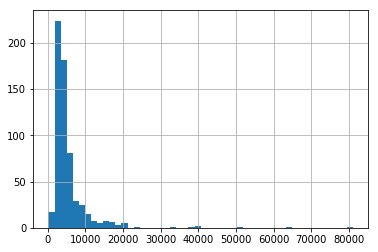

In [19]:
file['ApplicantIncome'].hist(bins = 50)

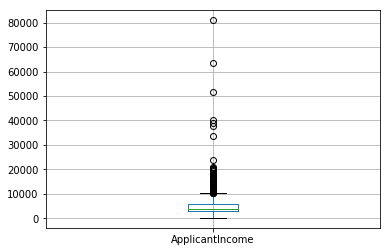

In [20]:
file.boxplot(column = 'ApplicantIncome')

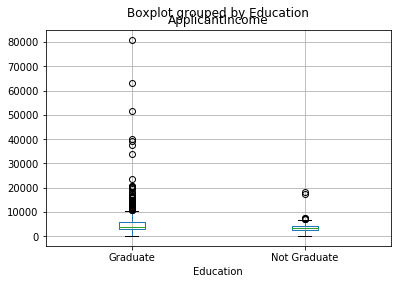

In [22]:
file.boxplot(column = 'ApplicantIncome', by = 'Education')

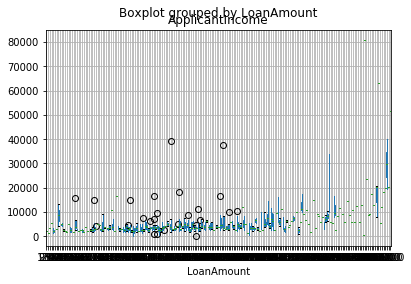

In [23]:
file.boxplot(column = 'ApplicantIncome', by = 'LoanAmount')

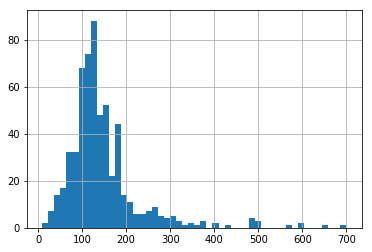

In [25]:
file['LoanAmount'].hist(bins = 50)

In [26]:
file.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [42]:
temp1 = file['Credit_History'].value_counts(ascending = True)

temp2 = file.pivot_table(values = 'Loan_Status', index = ['Credit_History'], aggfunc= lambda x : x.map({'Y':1, 'N':0}).mean())

print('Frequency Table for Credit History')
print(temp1)

print('Probability of getting a loan for each Credit History class, 0/1')

print(temp2)

Frequency Table for Credit History
0.0     89
1.0    475
Name: Credit_History, dtype: int64
Probability of getting a loan for each Credit History class, 0/1
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


In [51]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

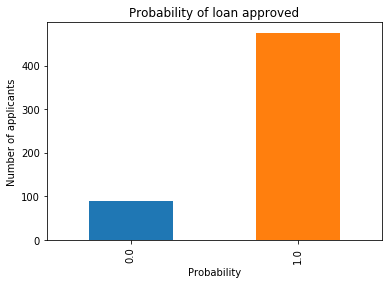

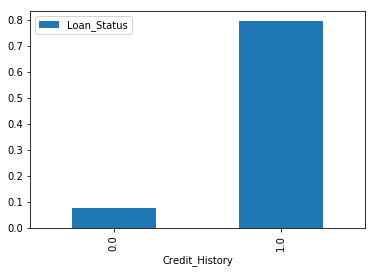

In [68]:
fig = plt.Figure(figsize = (8,4))

ax1 = fig.add_subplot(121)

plt.xlabel('Credit History')
plt.ylabel('Number of applicants')
plt.title('Applicants by credit history')
temp1.plot(kind = 'bar')

plt.xlabel('Probability')
plt.ylabel('Number of applicants')
plt.title('Probability of loan approved')
temp2.plot(kind = 'bar')



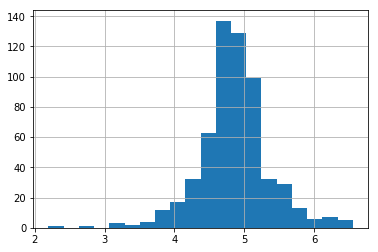

In [80]:
file['LoanAmount_log'] = np.log(file['LoanAmount'])
file['LoanAmount_log'].hist(bins = 20)

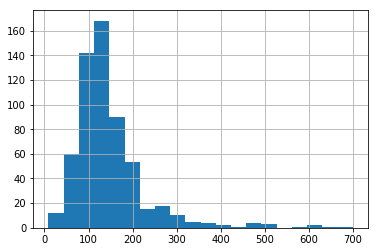

In [81]:
file['LoanAmount'].hist(bins = 20)

In [84]:
from sklearn.preprocessing import LabelEncoder

In [85]:
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for i in var_mod:
    file[i] = le.fit_transform(file[i])
file.dtypes 

TypeError: '<' not supported between instances of 'str' and 'float'